In [2]:
!pip install --upgrade pip
!pip install pyathena

In [3]:
#Upgrade de la version de seaborn para poder hacer graficos mas facil 
!pip install seaborn==0.12.2

In [4]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [5]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
tabla = 'receiver'
tabla1 = 'receiver_fraud'


In [6]:
#Connection

conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_branch = pd.read_sql(f'SELECT id_branch, min(DATE_RECEIVER) primer, max(DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla} GROUP BY id_branch;', conn)
df_branch_fraud = pd.read_sql(f'SELECT r.id_branch, min(r.DATE_RECEIVER) primer, max(r.DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch;', conn)

#, COUNT(distinct DATE_TRUNC(¨day¨, DATE_RECEIVER)) dias

/tmp/ipykernel_293/1694804894.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch = pd.read_sql(f'SELECT id_branch, min(DATE_RECEIVER) primer, max(DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla} GROUP BY id_branch;', conn)
/tmp/ipykernel_293/1694804894.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch_fraud = pd.read_sql(f'SELECT r.id_branch, min(r.DATE_RECEIVER) primer, max(r.DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch;', conn)


In [7]:
df_branch.head()

,id_branch,primer,ultima,transacciones
0,A00135,2020-02-12 16:37:31.000,2021-11-05 14:33:38.167,18878
1,A20019,2020-09-19 16:34:43.470,2022-01-28 16:18:45.773,589
2,A13542,2020-02-12 16:56:37.340,2024-02-03 21:21:11.933,14388
3,A19128,2020-04-25 13:27:15.440,2024-02-03 18:44:32.113,59501
4,A12917,2020-02-12 18:39:43.847,2024-02-03 18:47:22.133,8470


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Text(0.5, 1.0, 'Fraudes')

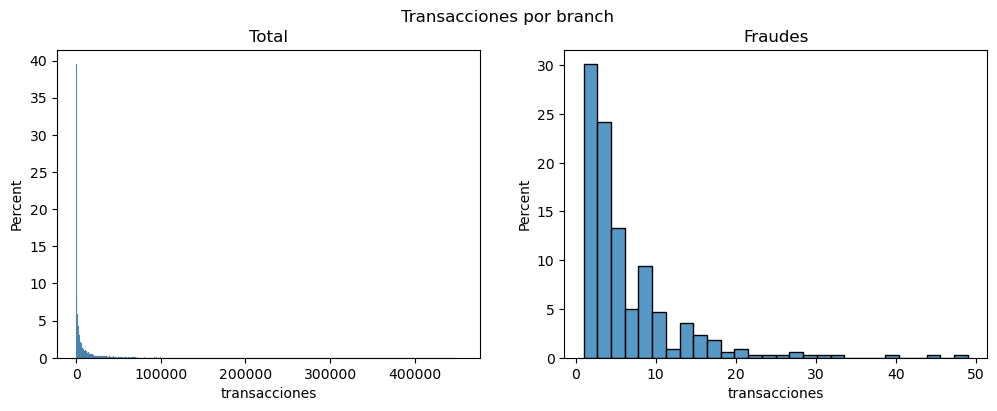

In [13]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Transacciones por branch')
sns.histplot(data = df_branch, x = 'transacciones', ax = axs[0], stat='percent').set_title('Total')
sns.histplot(data = df_branch_fraud, x ='transacciones', ax = axs[1], stat='percent').set_title('Fraudes')

In [11]:
df_branch['prom_diario'] = df_branch['dif_dias']/df_branch['transacciones']
df_branch_fraud['prom_diario'] = df_branch_fraud['dif_dias']/df_branch_fraud['transacciones']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Text(0.5, 1.0, 'Fraudes')

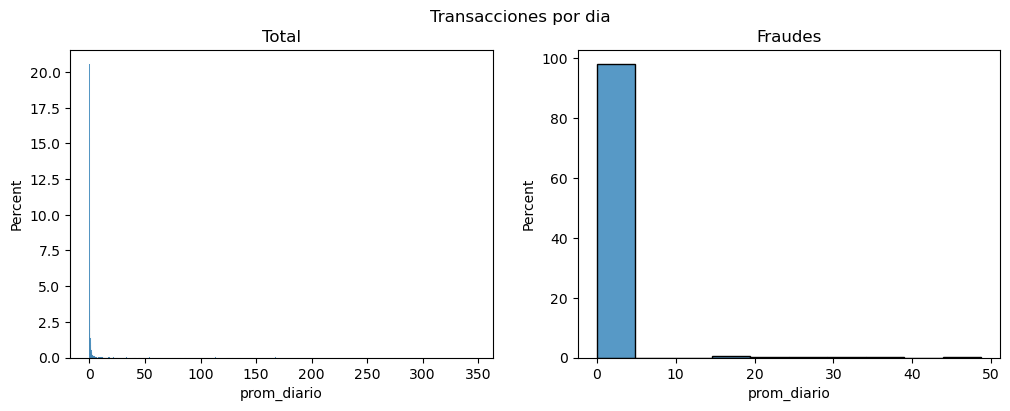

In [14]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Transacciones por dia')
sns.histplot(data = df_branch, x = 'prom_diario', ax = axs[0], stat='percent').set_title('Total')
sns.histplot(data = df_branch_fraud, x ='prom_diario', ax = axs[1], stat='percent').set_title('Fraudes')

In [18]:
df_branch_fraud[df_branch_fraud['prom_diario']>10]

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
102,A22037,2022-09-03 18:02:12.407,2023-06-06 22:29:26.623,8,276,34.500000
121,A05706,2022-03-25 19:24:30.830,2023-09-02 19:10:37.683,24,525,21.875000
146,A23733,2023-01-26 09:21:55.793,2024-01-02 11:33:10.120,7,341,48.714286
175,A18391,2022-08-12 21:40:04.417,2023-04-22 19:27:51.687,8,252,31.500000
203,A16136,2022-02-09 13:56:55.140,2023-02-05 16:33:09.453,14,361,25.785714
286,A23364,2023-03-18 12:31:09.653,2023-06-08 18:56:43.303,5,82,16.400000
322,A19658,2022-09-24 18:56:24.150,2022-11-21 15:23:32.467,3,57,19.000000


In [26]:
df_branch_fraud.iloc[102,]
df_branch_fraud[df_branch_fraud['id_branch']=='A22037    ']

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
102,A22037,2022-09-03 18:02:12.407,2023-06-06 22:29:26.623,8,276,34.5


In [24]:
df_branch[df_branch['id_branch']=='A22037    ']

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
2092,A22037,2021-12-22 16:21:58.157,2024-02-03 20:56:28.430,25995,773,0.029736


In [8]:
df_branch['dif_dias'] = (df_branch['ultima'] - df_branch['primer']).dt.days
df_branch_fraud['dif_dias'] = (df_branch_fraud['ultima'] - df_branch_fraud['primer']).dt.days

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Text(0.5, 1.0, 'Dias hasta Fraude')

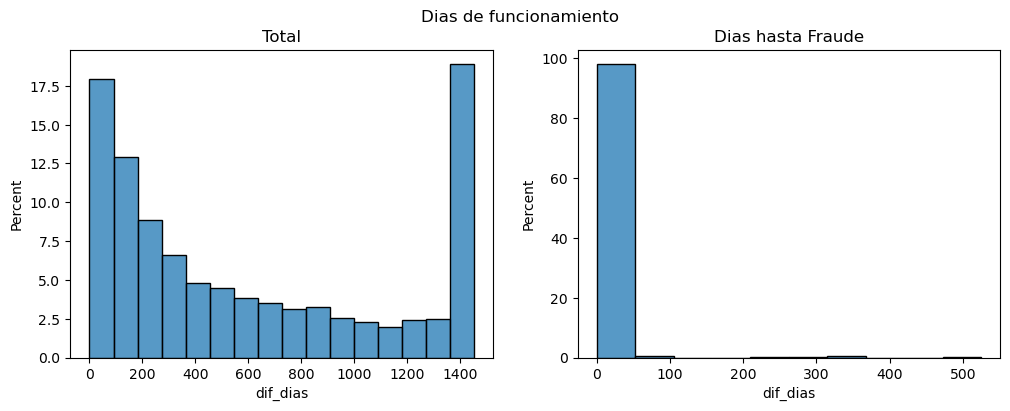

In [27]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Dias de funcionamiento')
sns.histplot(data = df_branch, x = 'dif_dias', ax = axs[0], stat='percent').set_title('Total')
sns.histplot(data = df_branch_fraud, x ='dif_dias', ax = axs[1], stat='percent').set_title('Dias hasta Fraude')

In [31]:
df_branch_fraud[df_branch_fraud['dif_dias']>50]

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
102,A22037,2022-09-03 18:02:12.407,2023-06-06 22:29:26.623,8,276,34.500000
121,A05706,2022-03-25 19:24:30.830,2023-09-02 19:10:37.683,24,525,21.875000
146,A23733,2023-01-26 09:21:55.793,2024-01-02 11:33:10.120,7,341,48.714286
175,A18391,2022-08-12 21:40:04.417,2023-04-22 19:27:51.687,8,252,31.500000
203,A16136,2022-02-09 13:56:55.140,2023-02-05 16:33:09.453,14,361,25.785714
286,A23364,2023-03-18 12:31:09.653,2023-06-08 18:56:43.303,5,82,16.400000
322,A19658,2022-09-24 18:56:24.150,2022-11-21 15:23:32.467,3,57,19.000000


In [38]:
df_branch_fraud['dif_dias'].value_counts()

dif_dias
0      328
2        2
1        2
276      1
341      1
525      1
252      1
361      1
82       1
57       1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Dias hasta Fraude')

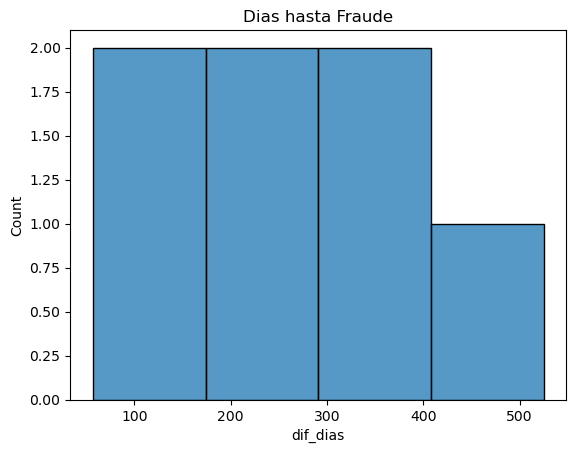

In [37]:
sns.histplot(data = df_branch_fraud[df_branch_fraud['dif_dias']>5], x ='dif_dias').set_title('Dias hasta Fraude')

In [12]:
df_branch.head()

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
0,A00135,2020-02-12 16:37:31.000,2021-11-05 14:33:38.167,18878,631,0.033425
1,A20019,2020-09-19 16:34:43.470,2022-01-28 16:18:45.773,589,495,0.840407
2,A13542,2020-02-12 16:56:37.340,2024-02-03 21:21:11.933,14388,1452,0.100917
3,A19128,2020-04-25 13:27:15.440,2024-02-03 18:44:32.113,59501,1379,0.023176
4,A12917,2020-02-12 18:39:43.847,2024-02-03 18:47:22.133,8470,1452,0.171429
